<a href="https://colab.research.google.com/github/hasanzeynal/Tensorflow-Developer-Certificate/blob/main/01_Neural_Network_Regression_in_TensorFlow/neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

In [2]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
#ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# Basic Neural Network Model for Regression Problem
Then, After building our basic NN model, we are gonna try:
* improving our model
* evaluating
* setting
* saving
* loading
* processing with feature scalling(normalising, fitting model on a scaled data)

## Building Basic Model in TensorFlow

## Creating Data, So we can model it

In [4]:
X = tf.constant([-1,1,3,5,7,9,11,13,15,17,19,21,23])
y = tf.constant([9,11,13,15,17,19,21,23,25,27,29,31,33])  #the difference between X and y is 10

In [5]:
#looking for the input and output shape
X.shape,y.shape  #just we are gonna need comma in the tensoor shape after 14 so shape is (14,)

(TensorShape([13]), TensorShape([13]))

### Steps in Modelling in TensorFlow.
1. **Creating Model** - define imput, output, hidden layers of our Deep Learning Model.

2. **Compiling Model** - define the loss function(the function which tell us how wrong our model is), define optimizer(which tell us our model how improve) and evaluation metrics(we can use to interpret the performance of our model).

3. Fitting Model - letting the model try to find patterns between X and y(features and labels)

In [6]:
#change 1 rank tensoir to the 2 rank tensor
tf.expand_dims(X,-1)

<tf.Tensor: shape=(13, 1), dtype=int32, numpy=
array([[-1],
       [ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21],
       [23]], dtype=int32)>

In [7]:
#creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])
#adding dense layer with the 1 neuron
#model.add(tf.keras.layers.Dense(1, input_shape = (14,)))
#model.add(tf.keras.layers.Dense(1))

#compiling the model
model.compile(loss= tf.keras.losses.mae,  #MAE stands for the Mean Absolute Error
              optimizer= tf.keras.optimizers.SGD(), #SGD stands for the Stochastic Gradient Error
              metrics= ['mae'])

#fitting the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs= 5)  #axis= -1 makes 2 rank tensor,1 rank tensor is caused an error

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 23.8215 - mae: 23.8215
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 22.6015 - mae: 22.6015
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 21.3815 - mae: 21.3815
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 20.1615 - mae: 20.1615
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 18.9415 - mae: 18.9415


In [8]:
#trying make prediction based on X for y
model.predict([25])     #if our model is good enough, the answer would be around 35

1/1 [==============================] - 0s 75ms/step


array([[7.3875003]], dtype=float32)

## Improving our model

### Creating new model to improve our result

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state = True)

In [10]:
#create a model(specified to your probelm)
improved_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#compile model
improved_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                       metrics = ['mae'])

#fit the model with the subset of X and y and 100 epochs
improved_model.fit(tf.expand_dims(X_train,axis= 1),y_train,epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 24.2121 - mae: 24.2121
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 23.4617 - mae: 23.4617
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 22.7291 - mae: 22.7291
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 22.0328 - mae: 22.0328
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 21.3630 - mae: 21.3630
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 20.6976 - mae: 20.6976
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 20.0334 - mae: 20.0334
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 19.3817 - mae: 19.3817
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 18.7421 - mae: 18.7421
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 18.1108 - mae: 18.1108
Epoch 11/100
1/1 [==============================] -

In [11]:
#let's see the result by doing prediction in the same way as we did before on 'model'
improved_model.predict([21])     #so much closer as you see, better and more usefull

1/1 [==============================] - 0s 117ms/step


array([[32.958652]], dtype=float32)

### See if we even can do more changes to get more better predictions


In [12]:
#create the model with extra hidden layer(100 hidden units)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),   #1 hidden layer is added with 100 hidden units
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr = 0.0001),   #lr is changed
              metrics = ['mae'])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 150)  #number of epochs is changed

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 23.0036 - mae: 23.0036
Epoch 2/150
1/1 [==============================] - 0s 12ms/step - loss: 22.4766 - mae: 22.4766
Epoch 3/150
1/1 [==============================] - 0s 14ms/step - loss: 21.9797 - mae: 21.9797
Epoch 4/150
1/1 [==============================] - 0s 12ms/step - loss: 21.5087 - mae: 21.5087
Epoch 5/150
1/1 [==============================] - 0s 11ms/step - loss: 21.0327 - mae: 21.0327
Epoch 6/150
1/1 [==============================] - 0s 15ms/step - loss: 20.5617 - mae: 20.5617
Epoch 7/150
1/1 [==============================] - 0s 11ms/step - loss: 20.1365 - mae: 20.1365
Epoch 8/150
1/1 [==============================] - 0s 13ms/step - loss: 19.7085 - mae: 19.7085
Epoch 9/150
1/1 [==============================] - 0s 12ms/step - loss: 19.2808 - mae: 19.2808
Epoch 10/150
1/1 [==============================] - 0s 11ms/step - loss: 18.8362 - mae: 18.8362
Epoch 11/150
1/1 [==============================] -

In [13]:
#making prediction again
model.predict([21])     #a litle bit better rather than our second model and way much better than first model

1/1 [==============================] - 0s 80ms/step


array([[32.730835]], dtype=float32)

## Evaluating Model
When it comes to the evaluation, there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

In [14]:
#make a bigger dataset
X = tf.range(-200,300,10)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100,
        -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,
         20,   30,   40,   50,   60,   70,   80,   90,  100,  110,  120,
        130,  140,  150,  160,  170,  180,  190,  200,  210,  220,  230,
        240,  250,  260,  270,  280,  290], dtype=int32)>

In [15]:
y = X + 15
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-185, -175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,
        -75,  -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,
         35,   45,   55,   65,   75,   85,   95,  105,  115,  125,  135,
        145,  155,  165,  175,  185,  195,  205,  215,  225,  235,  245,
        255,  265,  275,  285,  295,  305], dtype=int32)>

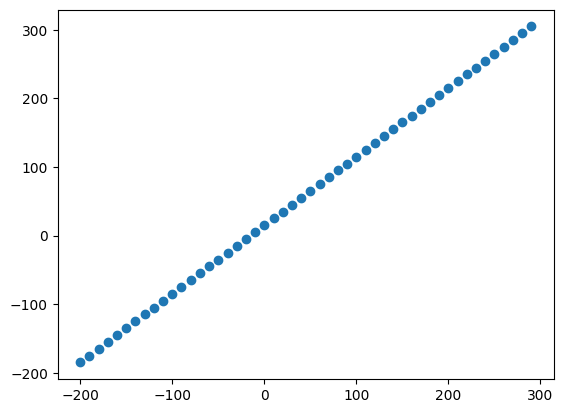

In [16]:
#visualize data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

### 3 sets....
* Train Test
* Validation Test
* Test Set


In [17]:
#split X to the train and test set
X_train = X[:40]
X_test = X[40:]
#split y too
y_train = y[:40]
y_test = y[40:]

### Visulising dataset
Now we have got our data in the training and test datasets

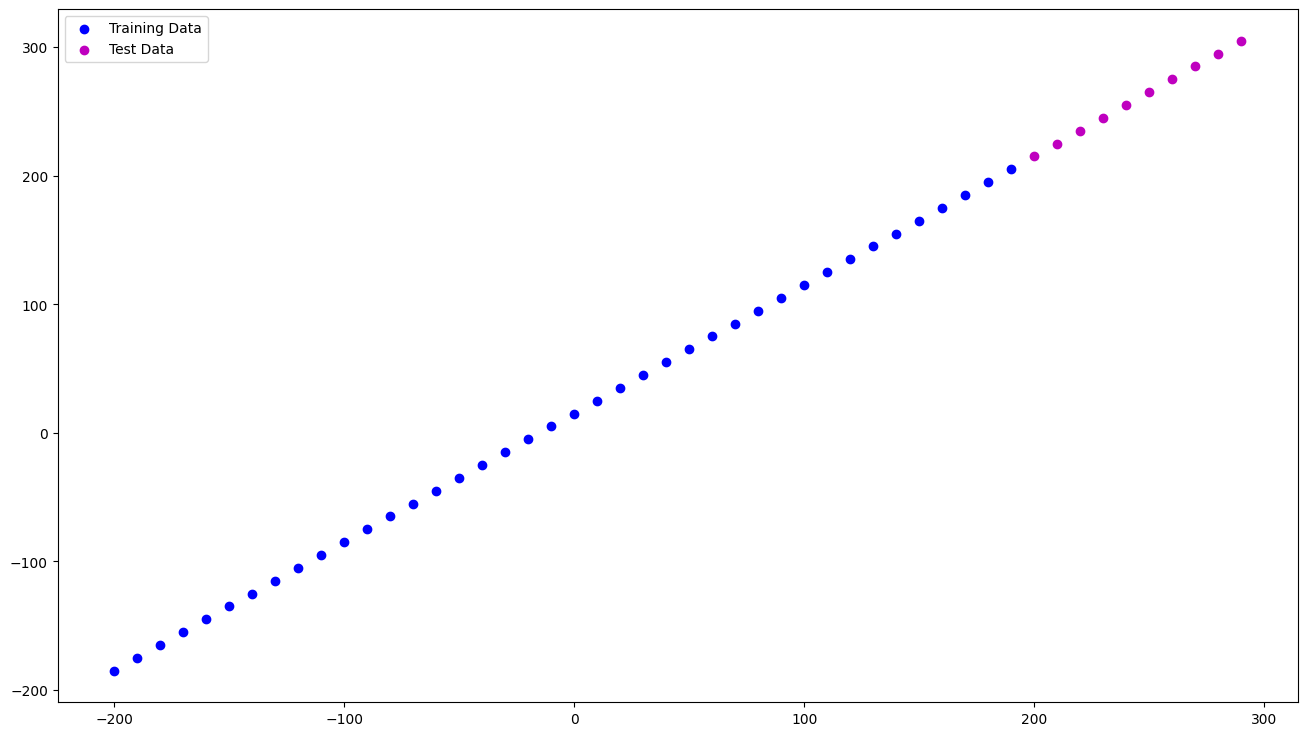

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c='b',label = 'Training Data')
plt.scatter(X_test,y_test,c= 'm',label = 'Test Data')
plt.legend()
plt.show()

### Visualising the model



In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.0001),
              metrics = ['mae'])

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 100,batch_size = 10)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 91.1870 - mae: 91.1870
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 75.1277 - mae: 75.1277
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 58.6770 - mae: 58.6770
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 43.1839 - mae: 43.1839
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 28.4854 - mae: 28.4854
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 19.4474 - mae: 19.4474
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 8.6786 - mae: 8.6786
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 14.0403 - mae: 14.0403
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 10.7295 - mae: 10.7295
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 8.7344 - mae: 8.7344
Epoch 11/100
4/4 [==============================] - 0s 4ms/step

In [20]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 89ms/step


In [21]:
predictions

array([[217.60599],
       [228.2257 ],
       [238.84543],
       [249.46513],
       [260.08484],
       [270.70508],
       [281.34442],
       [291.98373],
       [302.6231 ],
       [313.26242]], dtype=float32)

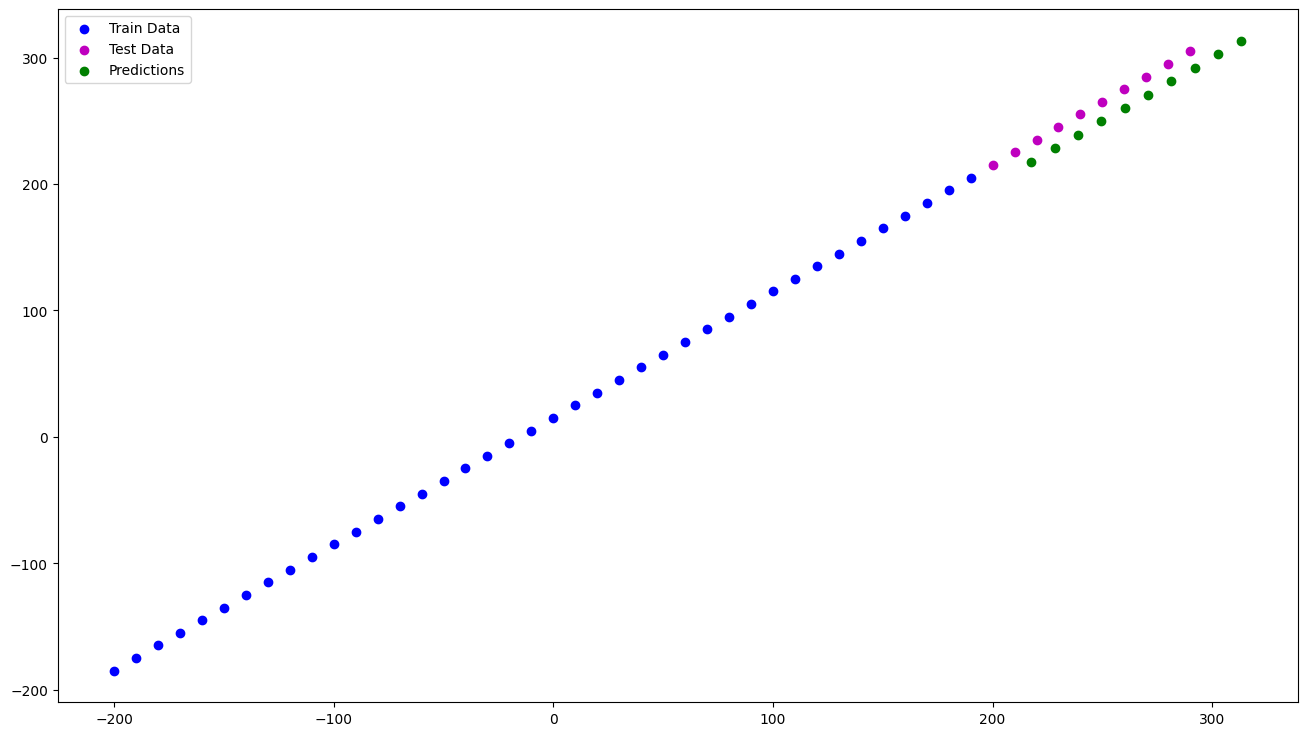

In [22]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c= 'b',label = 'Train Data')
plt.scatter(X_test,y_test,c= 'm',label= 'Test Data')
plt.scatter(predictions,predictions,c ='g',label= 'Predictions')
plt.legend()
plt.show()

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (10, 100)                 200       
                                                                 
 dense_9 (Dense)             (10, 100)                 10100     
                                                                 
 dense_10 (Dense)            (10, 100)                 10100     
                                                                 
 dense_11 (Dense)            (10, 1)                   101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


### Another way to visualise our model


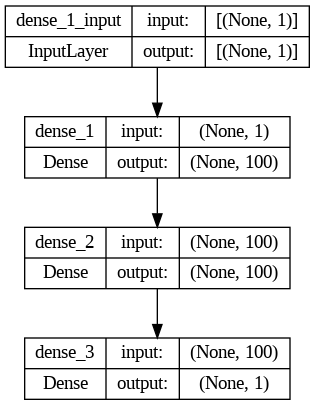

In [25]:
# import plot_model
from tensorflow.keras.utils import plot_model
#make a plot
plot_model(model = improved_model,show_shapes=1,show_dtype=False)

In [67]:
  #Let's create a model and get more spesific summary

  #create the model
  summarized_model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100,activation= 'relu', name='Input_Layer'),
      tf.keras.layers.Dense(100,activation= 'relu', name= 'First_Hidden_Layer'),
      tf.keras.layers.Dense(100,activation= 'relu', name= 'Second_Hidden_Layer'),
      tf.keras.layers.Dense(1,name= 'Output_Layer')],name= 'Just one of our models....')

  #compile the model
  summarized_model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

  summarized_model.build((40,1))
  #fit the model
  #summarized_model.fit(tf.expand_dims(X_train,axis=-1) ,y_train, epochs= 50)  #if you set the verbose yo don't get the training or something

In [68]:
#get the summary
summarized_model.summary()

Model: "Just one of our models...."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (40, 100)                 200       
                                                                 
 First_Hidden_Layer (Dense)  (40, 100)                 10100     
                                                                 
 Second_Hidden_Layer (Dense)  (40, 100)                10100     
                                                                 
 Output_Layer (Dense)        (40, 1)                   101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


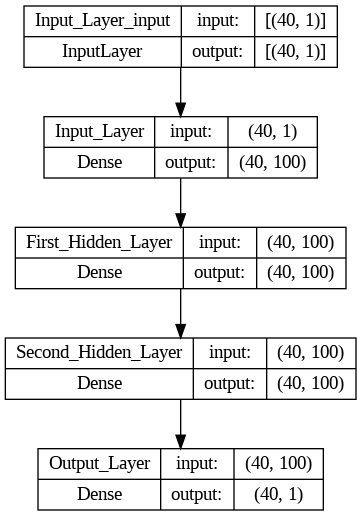

In [70]:
plot_model(summarized_model,show_shapes=True)

## Visualise our model predictions.
Steps that must be taken:
* Create tensors
* Build a model
* Get the predictions
* Visualise the model predictions

In [86]:
##create tensors
X = tf.range(57,431,3)
y = X + 10

#split them to the train and test data
X_train = X[:100]
X_test = X[100:]
y_train = y[:100]
y_test = y[100:]
#create a Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.001),
              metrics= ['mae'])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs = 50)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 218.1022 - mae: 218.1022
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 190.7074 - mae: 190.7074
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 164.6992 - mae: 164.6992
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 138.4228 - mae: 138.4228
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 111.1097 - mae: 111.1097
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 81.8101 - mae: 81.8101
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 50.7911 - mae: 50.7911
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 17.1715 - mae: 17.1715
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 14.3586 - mae: 14.3586
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 21.7921 - mae: 21.7921
Epoch 11/50
4/4 [==============================] - 0s 4ms/s

In [88]:
#get the predictions
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 19ms/step


array([[371.6429 ],
       [374.75604],
       [377.86923],
       [380.9824 ],
       [384.09555],
       [387.20874],
       [390.32187],
       [393.43503],
       [396.54816],
       [399.66132],
       [402.7745 ],
       [405.88766],
       [409.00082],
       [412.11398],
       [415.22714],
       [418.34027],
       [421.45343],
       [424.5666 ],
       [427.67972],
       [430.79288],
       [433.90604],
       [437.0192 ],
       [440.13235],
       [443.2455 ],
       [446.35867]], dtype=float32)

In [91]:
#creating function to plot the predictions
def plot_predictions(train_data= X_train,train_labels= y_train,
                     test_data= X_test,test_labels= y_test,
                     y_pred= predictions):
  plt.figure(figsize=(16,9))
  #visualise train data
  plt.scatter(X_train,y_train,c= 'b',label='Train Data')
  #visualise test data
  plt.scatter(X_test,y_test,c= 'g',label='Test Data')
  #visualise predictions data
  plt.scatter(X_test,predictions,c= 'm',label='Predictions')
  #plot legend
  plt.legend()
  #show the plot
  plt.show();

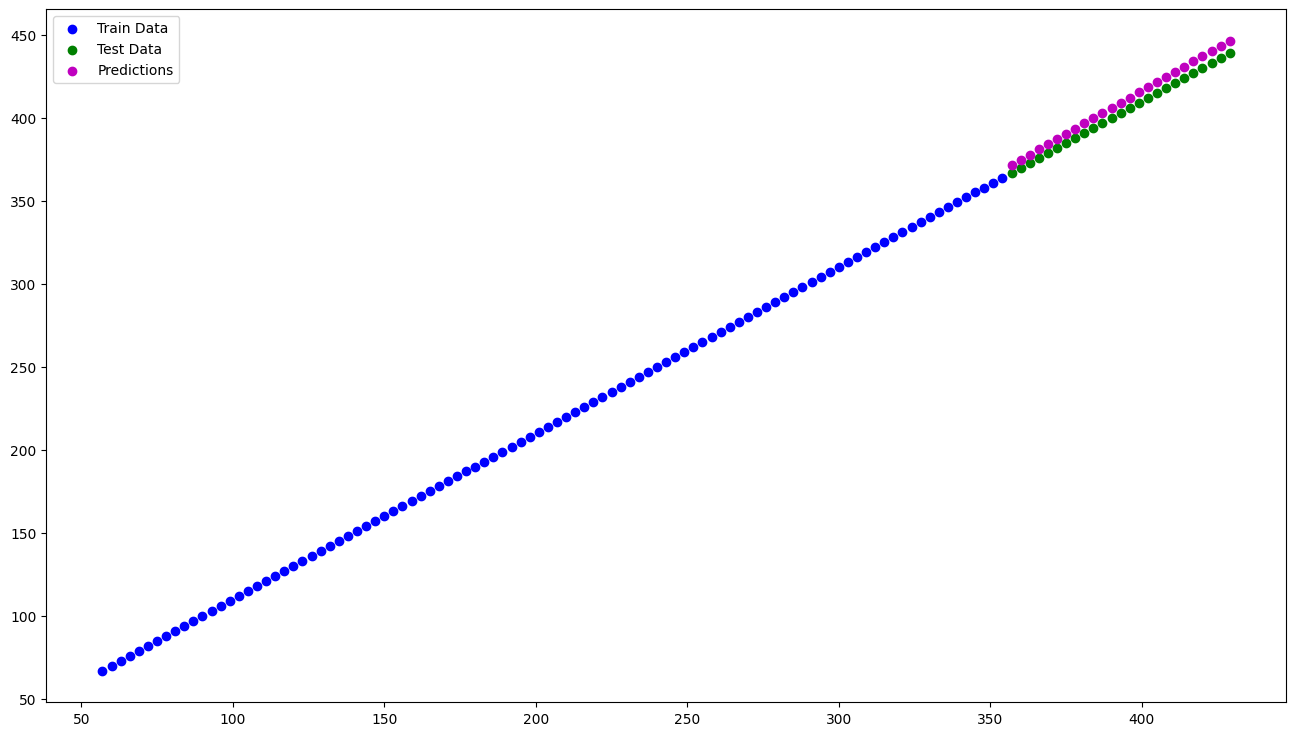

In [92]:
#plot predictions
plot_predictions()